# Example 3.3

Recall that this example deals with rejection sampling from the posterior distribution.

Recall that, we have a Gaussian prior and likelihood in the form
\begin{align*}
p(x) &= \mathcal{N}(x \mid \mu_0, \sigma_0^2) \\
p(y \mid x) &= \mathcal{N}(y \mid x, \sigma^2).
\end{align*}
We have derived the posterior in [Example 3.2](../chapter-3/Example-3-2.ipynb).

Area under unnormalised posterior:  0.3228684507565309


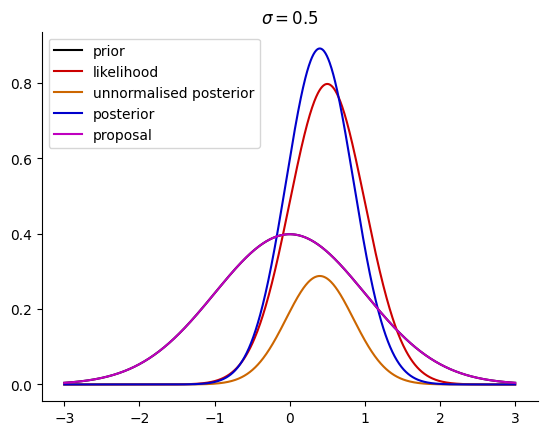

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def prior(x, mu0, sigma0):
    return np.exp(-0.5 * (x - mu0) ** 2 / sigma0 ** 2) / np.sqrt(2 * np.pi * sigma0 ** 2)


def likelihood(x, y, sigma):
    return np.exp(-0.5 * (y - x) ** 2 / sigma ** 2) / np.sqrt(2 * np.pi * sigma ** 2)


def un_posterior(x, y, mu0, sigma0, sigma):
    return prior(x, mu0, sigma0) * likelihood(x, y, sigma)


def posterior(x, y, mu0, sigma0, sigma):
    mu_p = (sigma ** 2 * mu0 + sigma0 ** 2 * y) / (sigma ** 2 + sigma0 ** 2)
    sigma_p = np.sqrt(sigma ** 2 * sigma0 ** 2 / (sigma ** 2 + sigma0 ** 2))
    return np.exp(-0.5 * (x - mu_p) ** 2 / sigma_p ** 2) / np.sqrt(2 * np.pi * sigma_p ** 2)


def q(x, mu, sigma):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2) / np.sqrt(2 * np.pi * sigma ** 2)


y = 0.5
mu0 = 0
sigma0 = 1
sigma = 0.5
sigma_1 = 0.7
sigma_2 = 0.5

M = 1
mu_q = 0
sigma_q = 1

xx = np.linspace(-3, 3, 1000)

# compute the area under the unnormalised posterior
area = np.trapz(un_posterior(xx, y, mu0, sigma0, sigma), xx)
print("Area under unnormalised posterior: ", area)

orange_rgb = [0.8, 0.4, 0]

#
plt.plot(xx, prior(xx, mu0, sigma0), 'k-', label='prior')
plt.plot(xx, likelihood(xx, y, sigma_2), color=[0.8, 0, 0], label='likelihood')
plt.plot(xx, un_posterior(xx, y, mu0, sigma0, sigma), color=orange_rgb, label='unnormalised posterior')
# # dark blue rgb code
plt.plot(xx, posterior(xx, y, mu0, sigma0, sigma), color=[0, 0, 0.8], label='posterior')
plt.title('$\sigma = 0.5$')
plt.plot(xx, M * q(xx, mu_q, sigma_q), 'm-', label='proposal')
# remove the top and right lines in graph
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

Next, we implement the rejection sampler as described in Example 3.3.

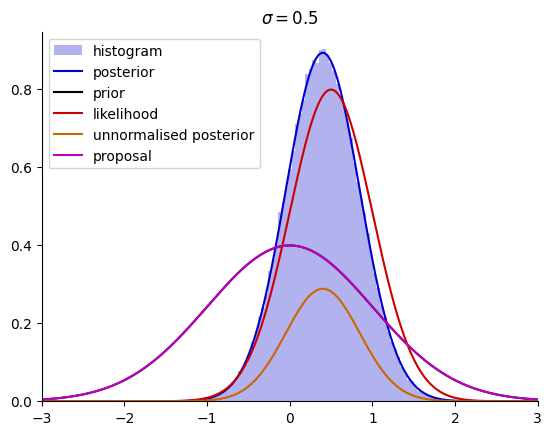

In [2]:
# implement rejection sampling for unnormalised posterior
def rejection_sampling(n, M):
    samples = []
    while len(samples) < n:
        x = np.random.normal(mu_q, sigma_q)
        u = np.random.uniform(0, 1)
        if u < un_posterior(x, y, mu0, sigma0, sigma) / (M * q(x, mu_q, sigma_q)):
            samples.append(x)
    return samples


ss = rejection_sampling(100000, M)
plt.hist(ss, bins=100, density=True, color=[0, 0, 0.8], alpha=0.3, label='histogram')
plt.plot(xx, posterior(xx, y, mu0, sigma0, sigma), c=[0, 0, 0.8], label='posterior')
plt.plot(xx, prior(xx, mu0, sigma0), 'k-', label='prior')
plt.plot(xx, likelihood(xx, y, sigma), color=[0.8, 0, 0], label='likelihood')
plt.plot(xx, un_posterior(xx, y, mu0, sigma0, sigma), color = orange_rgb, label='unnormalised posterior')
plt.title('$\sigma = 0.5$')
plt.plot(xx, M * q(xx, mu_q, sigma_q), 'm-', label='proposal')
plt.legend()
plt.xlim([-3, 3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()